In [1]:
import os
import math

In [2]:
import ROOT as R
# import numpy as np

Welcome to JupyROOT 6.22/00


In [3]:
R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.05)
# R.gStyle.SetPadLeftMargin(0.15)
R.gStyle.SetPadTopMargin(0.05)
R.gStyle.SetPadLeftMargin(0.12)

In [86]:
def draw(histos, config, out_file=None):
    size = (800, 800)
#     size = (1000, 800)
    if 'canvas' in config:
        size = config['canvas']
    C = R.TCanvas("canvas", "", size[0], size[1])
    C.SetGridx()
    C.SetGridy()
    R.SetOwnership(C, False)
    n = len(histos)
    leg = None
    if 'leg' in config:
        nc = 1
        if 'leg_nCol' in config:
            nc = config['leg_nCol']
        leg_l = 0.75
        if 'leg_left' in config:
            leg_l = config['leg_left']
        leg = R.TLegend(leg_l,0.95-(n/nc)*0.07, 0.95,0.95)
        leg.SetNColumns(nc)
        leg.SetMargin(0.25)
        leg.SetTextSize(0.04)
        R.SetOwnership(leg, 0)
    h_axis = None
    h_toDraw = []
    for iH, h_ori in enumerate(histos):
        h = h_ori.Clone()
        if iH == 0:
            h_axis = h
        if 'rebin' in config:
            h.Rebin(config['rebin'])
#         h.Rebin(2)
        if 'norm' in config:
            h.Scale(config['norm'] / h.Integral())
        R.SetOwnership(h, 0)
        h.SetLineWidth(2)
        if 'style' in config:
            h.SetLineStyle(config['style'][iH])
        h.SetLineColor(config['color'][iH])
#         h.SetLineColor(1)
#         h.SetFillColor(config['color'][iH])
        if leg:
            title = config['leg'][iH]
            fill = 'l'
            if title[0] == '`':
                fill = ''
                title = title[1:]
#             leg.AddEntry(h, config['leg'][iH], 'l')
            leg.AddEntry(h, title, fill).SetTextColor(config['color'][iH])
        h_toDraw.append(h)
    # Actually drawing
    h_axis.Draw('AXIS')
    h_axis.Draw('AXIG same')
    for iH, h in enumerate(h_toDraw):
        drawopt = 'hist'
        if 'drawopt' in config:
            drawopt = config['drawopt']
        drawopt += "same"
        h.Draw(drawopt)
    h_axis.Draw('AXIG same')
    if leg:
        leg.Draw()
        h_axis.GetYaxis().SetMaxDigits(4)
    if 'y' in config:
        h_axis.GetYaxis().SetRangeUser(*config['y'])
    if 'x' in config:
        h_axis.GetXaxis().SetRangeUser(*config['x'])
    if 'logY' in config:
        C.SetLogy(config['logY'])
    if 'logX' in config:
        C.SetLogx(config['logX'])
    if 'redraw' in config:
        for iH in config['redraw']:
            h_toDraw[iH].Draw('same')
    if 'x_title' in config:
        h_axis.GetXaxis().SetTitle(config['x_title'])
    C.RedrawAxis()
    C.Draw()
    if out_file:
        C.Print(out_file)

### BIB input MCParticle properties

In [113]:
# for f in files_in:
#     f.Close()
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp'
FILES_IN = [os.path.join(DIR_IN, p) for p in ['fluka/1p5TeV_v4.root', 'mars15/mumi-1e3x500-26m-lowth-excl.root']]
# FILES_IN = [os.path.join(DIR_IN, p) for p in ['fluka/part_new_sigma25_perNazar.root', 'mars15/mumi-1e3x500-26m-lowth-excl.root']]
files_in = [R.TFile(fIn) for fIn in FILES_IN]
trees = [fIn.Get('MyLCTuple') for fIn in files_in]

In [114]:
pdgs = [2112, 22, 11]
histos = [R.TH1F('h{0:d}_{1:d}'.format(p, f), ';Momentum [MeV];BIB Particles', 600, 0, 3000) for p in range(len(pdgs)) for f in range(len(trees))]
# histos = [R.TH1F('h{0:d}_{1:d}'.format(p, f), ';Momentum [MeV];BIB Particles', 500, 0, 50) for p in range(len(pdgs)) for f in range(len(trees))]

for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz)*1e3>>h{0:d}_{1:d}'.format(iP, iF), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 56096451
1 0 22 64347472
2 0 11 839643
0 1 2112 75727271
1 1 22 86201755
2 1 11 753425


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp/mcp_p_v4.pdf has been created


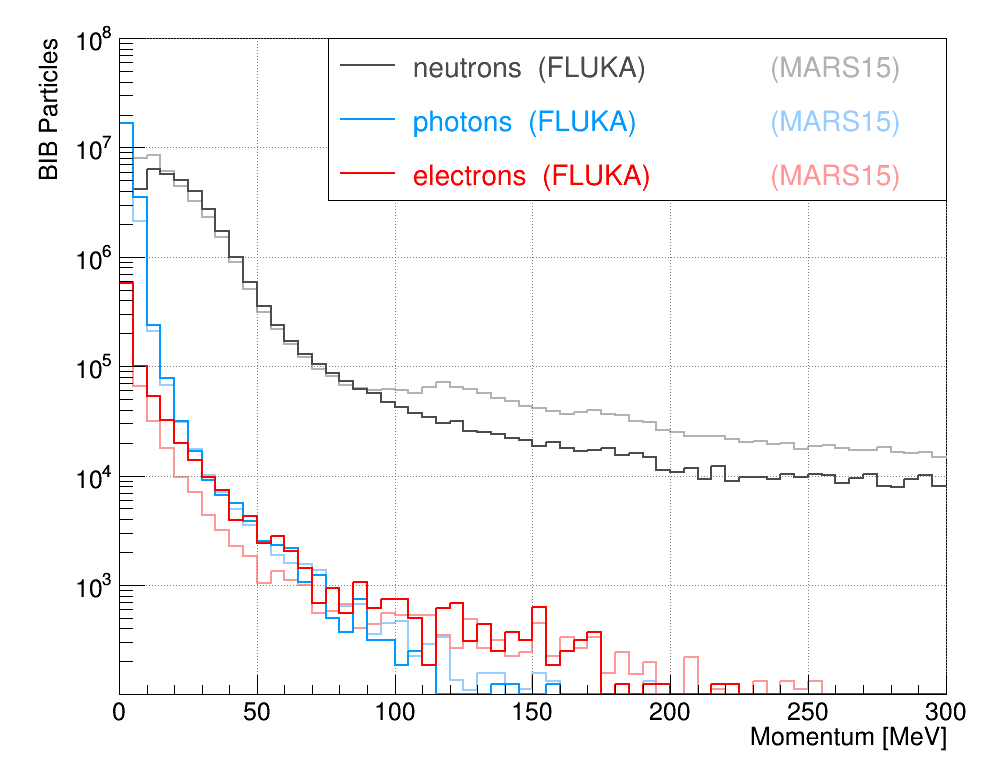

In [7]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'y': (1e2, 1e8),
              'x': (0, 300),
#               'x': (0, 35),
#               'rebin': 2,
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp/mcp_p_v4.pdf'))

### Particles low-momentum

In [117]:
pdgs = [2112, 22, 11]
histos = [R.TH1F('h{0:d}_{1:d}'.format(p, f), ';Momentum [MeV];BIB Particles', 600, 0, 3000) for p in range(len(pdgs)) for f in range(len(trees))]
# histos = [R.TH1F('h{0:d}_{1:d}'.format(p, f), ';Momentum [MeV];BIB Particles', 500, 0, 50) for p in range(len(pdgs)) for f in range(len(trees))]

for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz)*1e3>>h{0:d}_{1:d}'.format(iP, iF), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 31891954
1 0 22 38432982
2 0 11 331523
0 1 2112 46817325
1 1 22 59144736
2 1 11 375648


Warning in <TFile::Append>: Replacing existing TH1: h0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2_1 (Potential memory leak).


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp/mcp_p_low_v4.pdf has been created


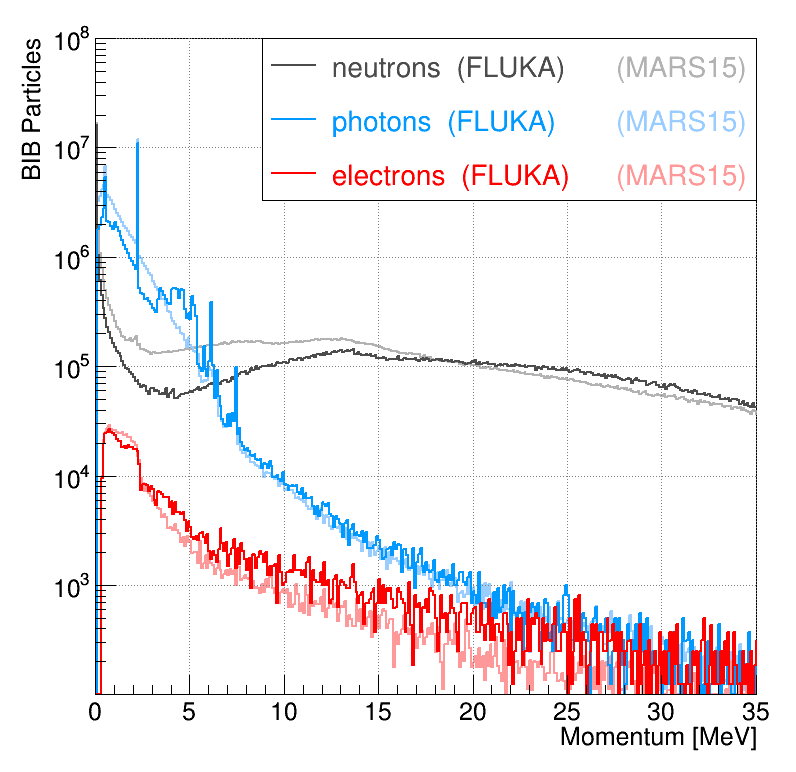

In [9]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'y': (1e2, 1e8),
#               'x': (0, 30),
              'x': (0, 35),
#               'rebin': 2,
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp/mcp_p_low_v4.pdf'))

### Neutrons zoomout

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp/mcp_p_neutrons_right_v4.pdf has been created


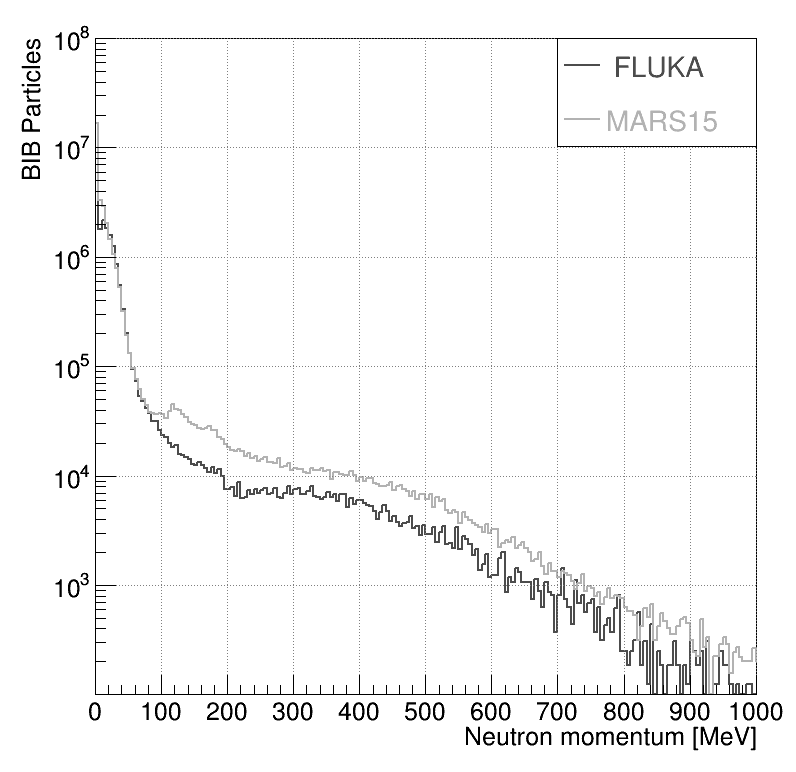

In [118]:
draw(histos[:2], {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kPink+1],
#               'redraw': [0, 2, 4],
              'leg': [' FLUKA', 'MARS15'],
              'leg_left': 0.7,
              'y': (1e2, 1e8),
              'x': (0, 1000),
              'x_title': 'Neutron momentum [MeV]',
#               'norm': 90,
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp/mcp_p_neutrons_v4.pdf'))

### Neutrons zoomin

In [13]:
pdgs = [2112]
# histos = [R.TH1F('h{0:d}_{1:d}'.format(p, f), ';Momentum [MeV];BIB Particles', 600, 0, 3000) for p in range(len(pdgs)) for f in range(len(trees))]
histos = [R.TH1F('h{0:d}_{1:d}'.format(p, f), ';Momentum [KeV];BIB Neutrons', 2000, 0, 2e3) for p in range(len(pdgs)) for f in range(len(trees))]

for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz)*1e6>>h{0:d}_{1:d}'.format(iP, iF), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 56096451
0 1 2112 75727271


Warning in <TFile::Append>: Replacing existing TH1: h0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0_1 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp/mcp_p_neutrons_low_v4.pdf has been created


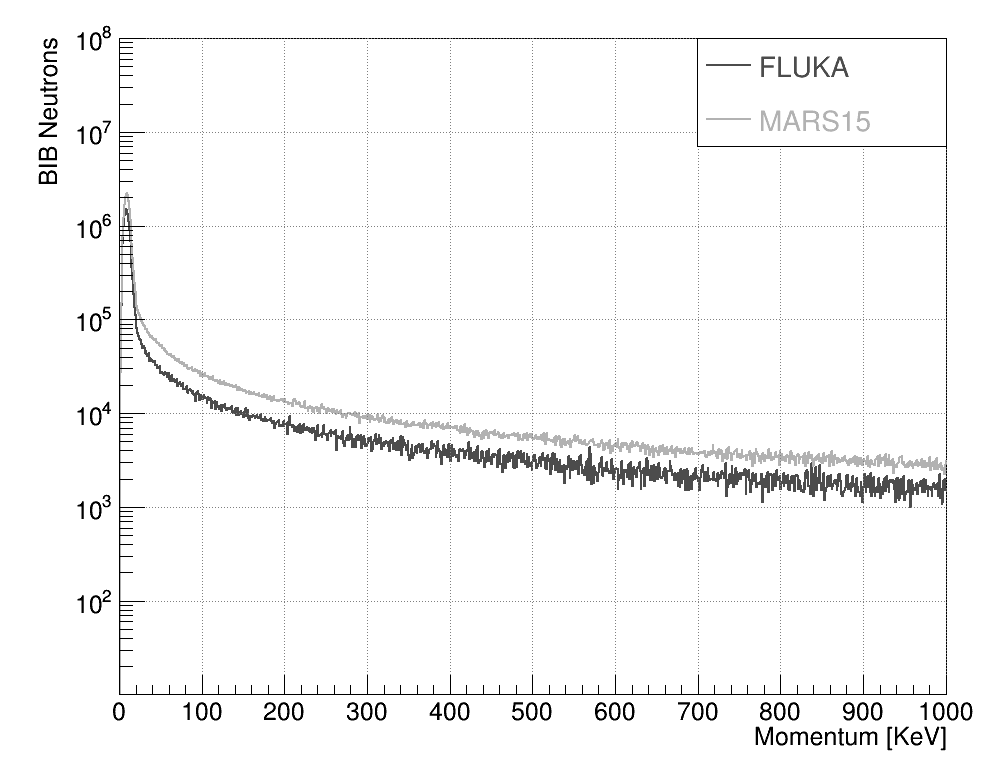

In [14]:
draw(histos[:2], {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kPink+1],
#               'redraw': [0, 2, 4],
              'leg': ['FLUKA', 'MARS15'],
              'leg_left': 0.7,
              'y': (1e1, 1e8),
              'x': (0, 1e3),
#               'norm': 90,
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp/mcp_p_neutrons_low_v4.pdf'))

### Vertex Z position

In [15]:
pdgs = [2112, 22, 11]
histos = [R.TH1F('hz{0:d}_{1:d}'.format(p, f), ';|Z| position [cm];BIB Particles', 600, 0, 1500) for p in range(len(pdgs)) for f in range(len(trees))]
for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('abs(mcvtz)/10.0>>hz{0:d}_{1:d}'.format(iP, iF), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 56096451
1 0 22 64347472
2 0 11 839643
0 1 2112 75727271
1 1 22 86201755
2 1 11 753425


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcpmcp_z_v4.pdf has been created


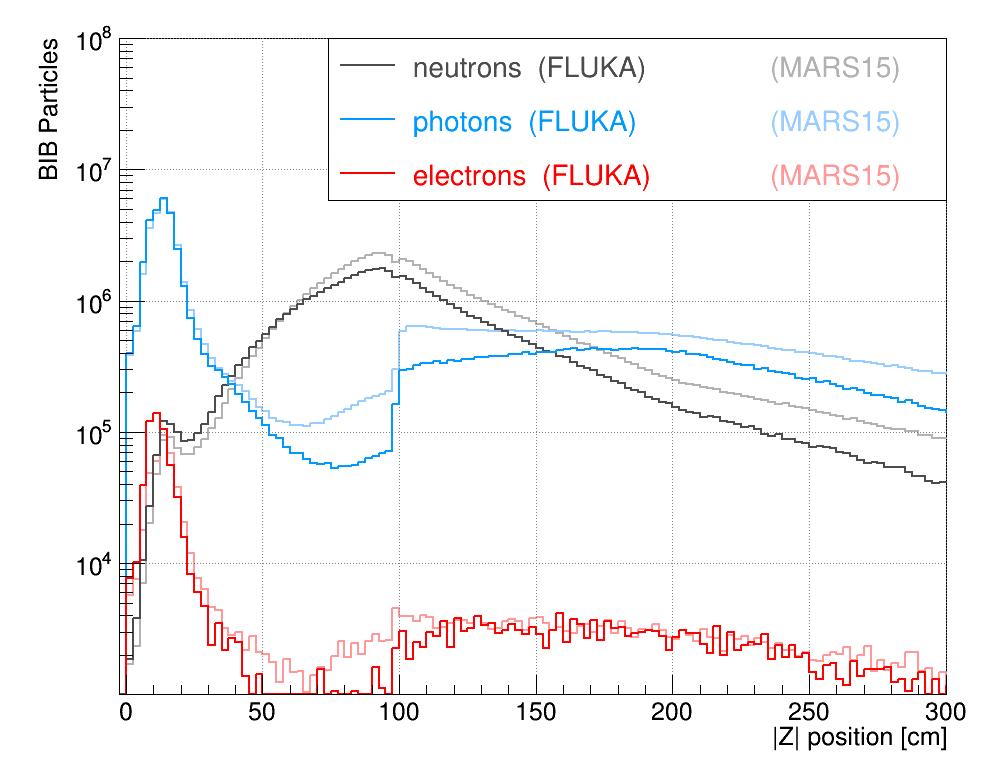

In [16]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'y': (1e3, 1e8),
              'x': (-50, 300),
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcpmcp_z_v4.pdf'))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp_z_zoomout.pdf has been created


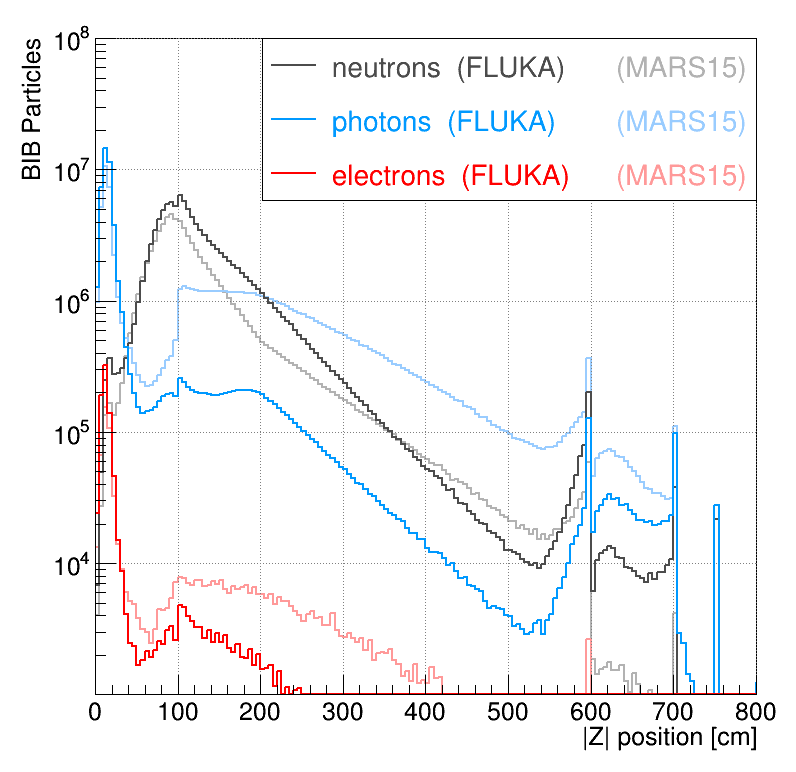

In [17]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'y': (1e3, 1e8),
              'x': (0, 800),
              'rebin': 2,
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp_z_zoomout.pdf'))

### Vertex Z position (asymmetric)

In [17]:
pdgs = [2112, 22, 11]
# e_min = {2112: 0.15, 22: }
histos = [R.TH1F('hz{0:d}_{1:d}'.format(p, f), ';Z position [cm];BIB Particles', 600, -150, 150) for p in range(len(pdgs)) for f in range(len(trees))]
for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('mcvtz/10.0>>hz{0:d}_{1:d}'.format(iP, iF), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 56096451
1 0 22 64347472
2 0 11 839643
0 1 2112 75727271
1 1 22 86201755
2 1 11 753425


Warning in <TFile::Append>: Replacing existing TH1: hz0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz1_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz1_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2_1 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp/mcp_z_asymmetric_v4.pdf has been created


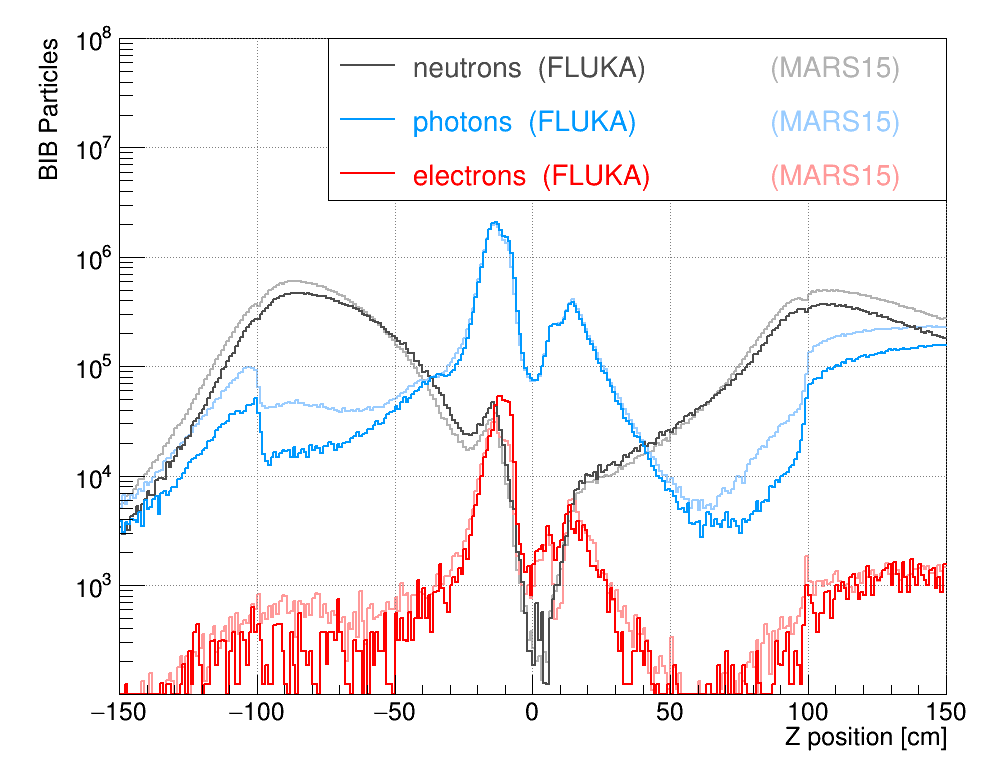

In [18]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'rebin': 2,
              'y': (1e2, 1e8),
              'x': (-150, 150),
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp/mcp_z_asymmetric_v4.pdf'))

### Vertex Z position (asymmetric) [full range]

In [17]:
pdgs = [2112, 22, 11]
histos = [R.TH1F('hz{0:d}_{1:d}'.format(p, f), ';Z position [cm];BIB Particles', 800, -800, 800) for p in range(len(pdgs)) for f in range(len(trees))]
for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('mcvtz/10.0>>hz{0:d}_{1:d}'.format(iP, iF), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 47308938
1 0 22 71187308
2 0 11 711710
0 1 2112 75727271
1 1 22 86201755
2 1 11 753425


Warning in <TFile::Append>: Replacing existing TH1: hz0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz1_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz1_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2_1 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp/mcp_z_asymmetric_zoomout_v3.pdf has been created


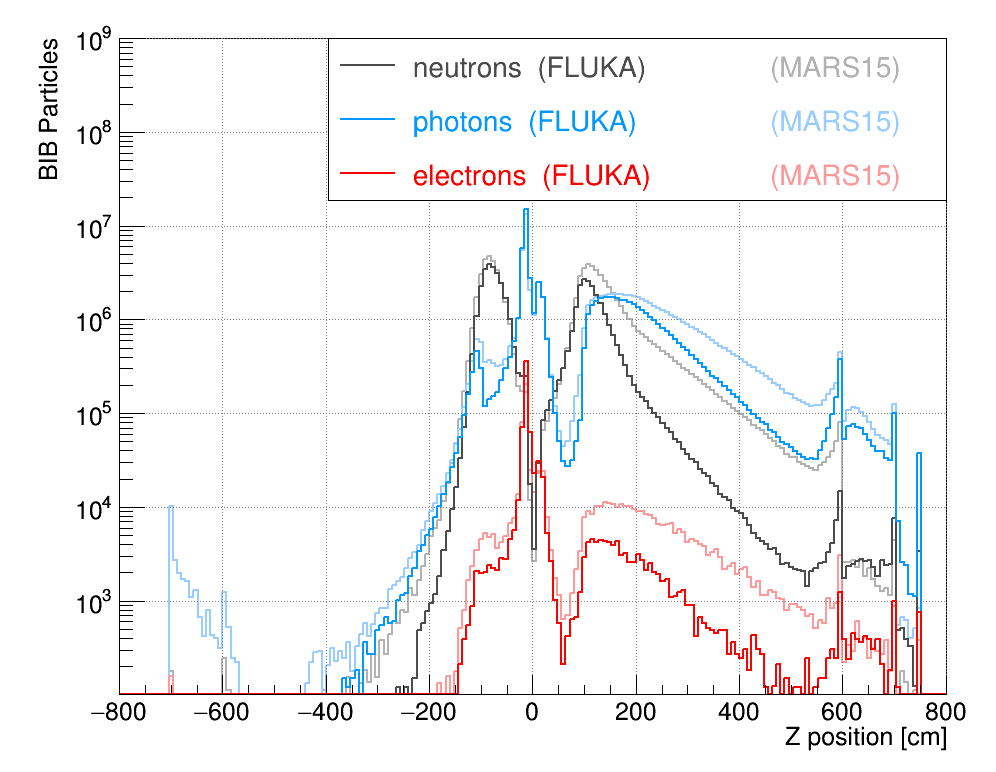

In [18]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'rebin': 4,
              'y': (1e2, 1e9),
#               'x': (-100, 100),
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp/mcp_z_asymmetric_zoomout_v3.pdf'))

### Exit R position in the beampipe region

In [422]:
pdgs = [2112, 22, 11]
histos = [R.TH1F('hr{0:d}_{1:d}'.format(p, f), ';R position [mm];BIB Particles', 200, 20, 30) for p in range(len(pdgs)) for f in range(len(trees))]
for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('sqrt(mcvtx*mcvtx + mcvty*mcvty)>>hr{0:d}_{1:d}'.format(iP, iF), 'abs(mcvtz) < 62.5 && abs(mcpdg) == {0:d}'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 9588
1 0 22 1851570
2 0 11 455741
0 1 2112 6366
1 1 22 1533563
2 1 11 19227


Warning in <TFile::Append>: Replacing existing TH1: hr0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr1_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr1_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr2_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr2_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr2_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hr2_1 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp_r_beampipe_centre.pdf has been created


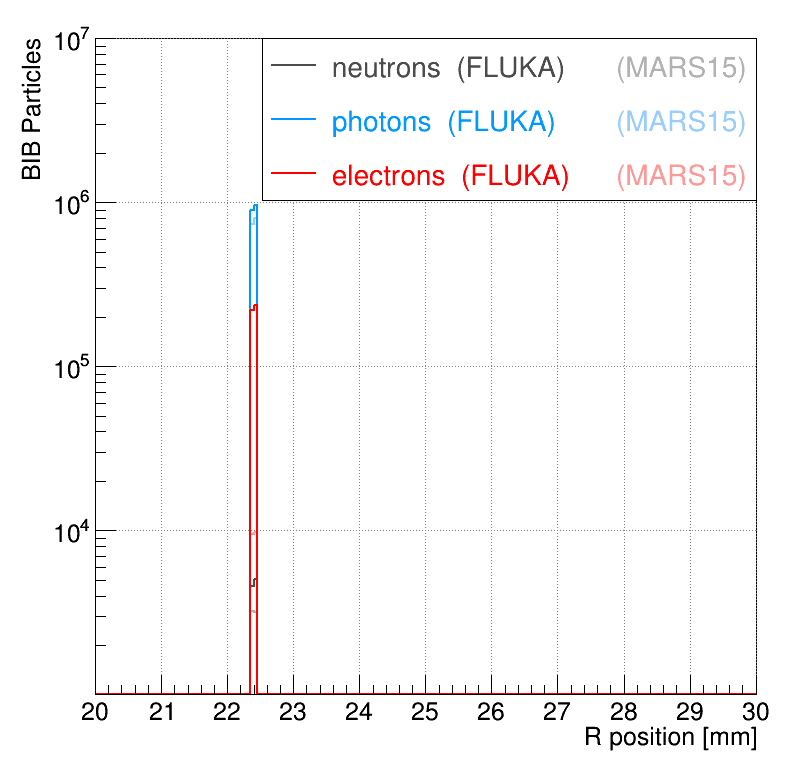

In [423]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'y': (1e3, 1e7),
              'x': (20, 30),
              'logY': True,
              'rebin': 1
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp_r_beampipe_centre.pdf'))

### Time

In [19]:
pdgs = [2112, 22, 11]
histos = [R.TH1F('ht{0:d}_{1:d}'.format(p, f), ';Arrival time [ns];BIB Particles', 2100, -100, 2000) for p in range(len(pdgs)) for f in range(len(trees))]
for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('mctim>>ht{0:d}_{1:d}'.format(iP, iF), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 56096451
1 0 22 64347472
2 0 11 839643
0 1 2112 75727271
1 1 22 86201755
2 1 11 753425


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp_t_v4.pdf has been created


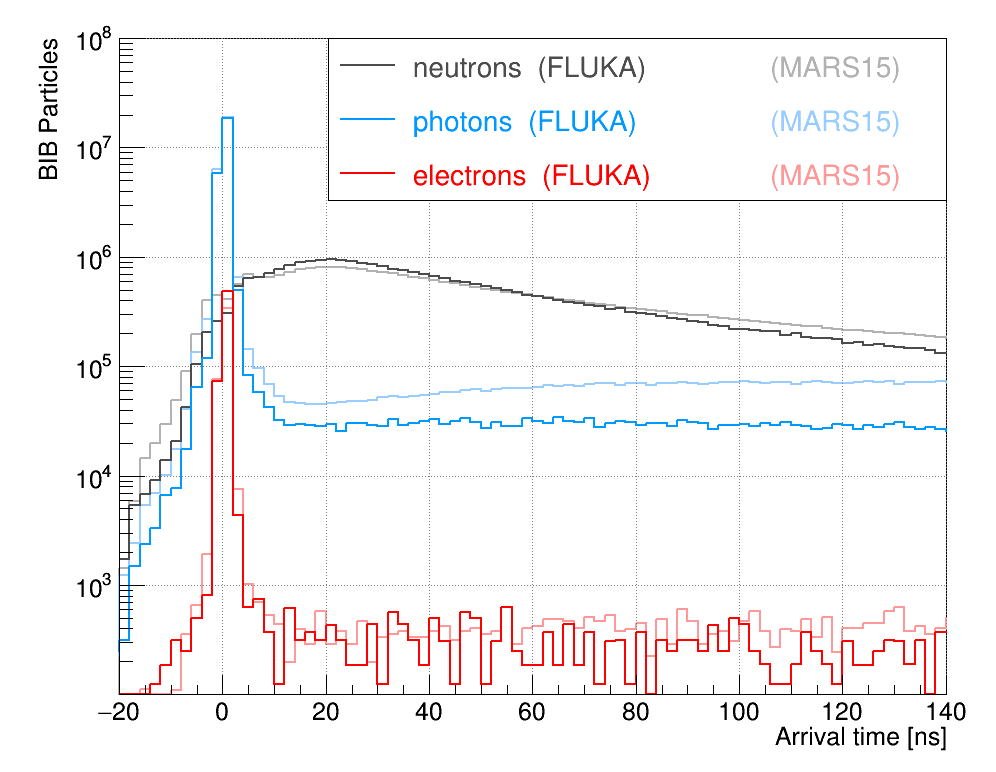

In [20]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'y': (1e2, 1e8),
              'x': (-20, 140),
              'rebin': 2,
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp_t_v4.pdf'))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp_t_zoomout.pdf has been created


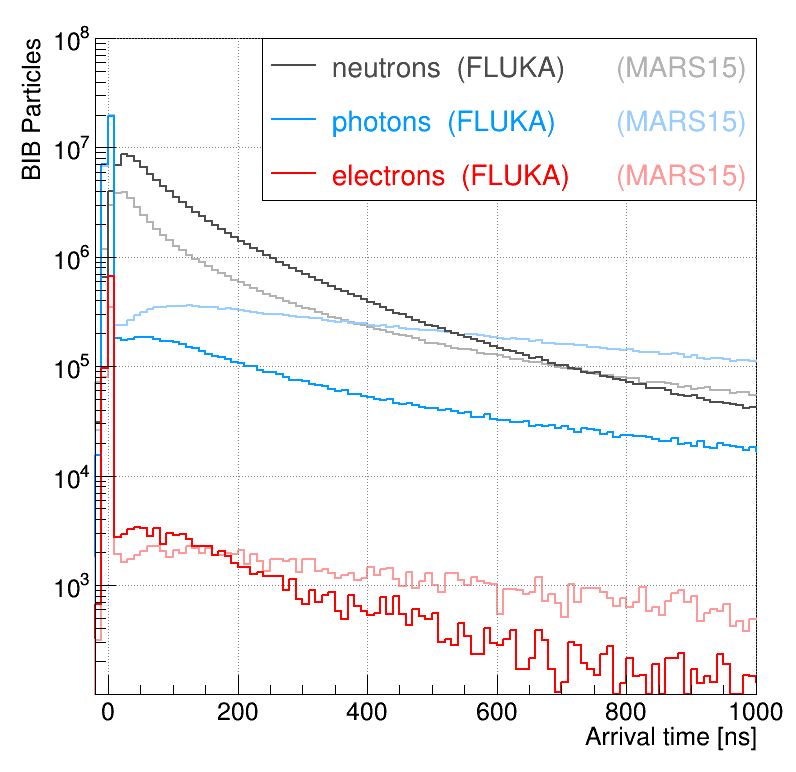

In [35]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'y': (1e2, 1e8),
              'x': (-20, 1000),
              'rebin': 10,
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp_t_zoomout.pdf'))

In [14]:
pdgs = [2112, 22, 11]
histos = [R.TH1F('ht{0:d}_{1:d}'.format(p, f), ';Arrival time [ns];BIB Particles', 2200, -10, 100) for p in range(len(pdgs)) for f in range(len(trees))]
for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('mctim>>ht{0:d}_{1:d}'.format(iP, iF), 'abs(mcpdg) == {0:d} && abs(mcvtz) < 200'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 445215
1 0 22 25270961
2 0 11 510067
0 1 2112 332655
1 1 22 24022773
2 1 11 341767


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/mcp/mcp_t_beampipe_v4.pdf has been created


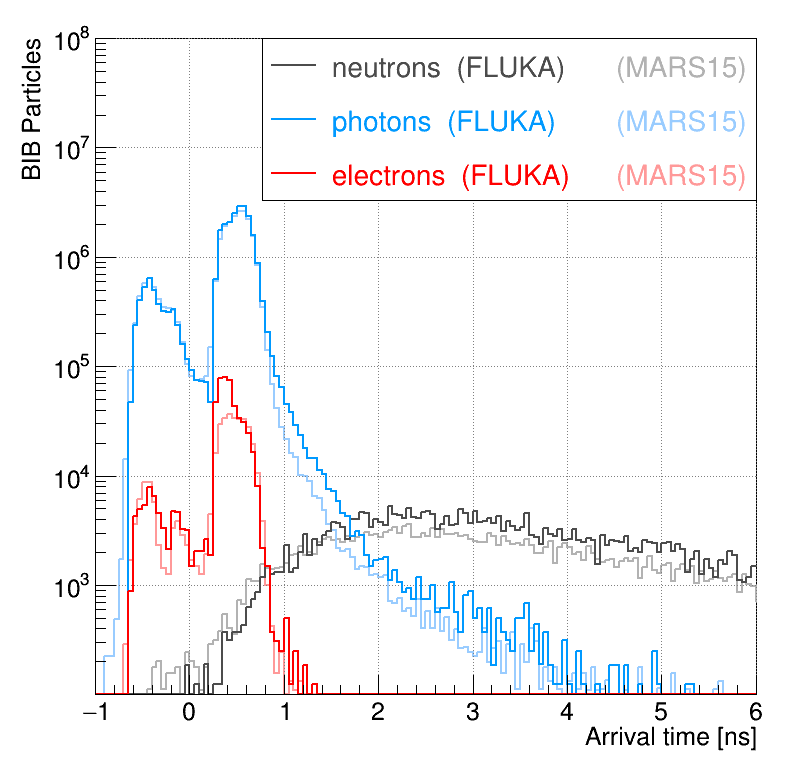

In [15]:
draw(histos, {'color': [12, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9],
              'redraw': [0, 2, 4],
              'leg': [' neutrons  (FLUKA)', '`(MARS15)  ', ' photons  (FLUKA)', '`(MARS15)  ', ' electrons  (FLUKA)', '`(MARS15)  '],
              'leg_nCol': 2,
              'leg_left': 0.33,
              'y': (1e2, 1e8),
              'x': (-1, 6),
              'rebin': 1,
              'logY': True
#              }, None)
             }, os.path.join(DIR_IN, '../plots/mcp/mcp_t_beampipe_v4.pdf'))

### Exit position vs energy plots

In [53]:
pdgs = [2112]
p_max = {2112: 800, 22: 100, 11: 100}
histos = {(p, f): R.TH2F('h2{0:d}_{1:d}'.format(p, f), ';Exit Z position [cm];Momentum [MeV]', 700, -700, 700, 400, 0, p_max[p]) for p in pdgs for f in range(len(trees))}

for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz)*1e3:mcvtz/10.0>>h2{0:d}_{1:d}'.format(pdg, iF), 'abs(mcpdg) == {0:d} && mctim < 15 && sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz)*1e3 > 150'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 785757
0 1 2112 1449920


In [54]:
C = R.TCanvas('c2d', '', 1000, 700)
C.SetGrid(1,1)
C.SetTopMargin(0.08)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.12)

KeyError: (2112, 2)

Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns_e_gt150MeV/z_e_2112_FLUKA_v2_v3.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns_e_gt150MeV/z_e_2112_FLUKA_v1_v3.pdf has been created


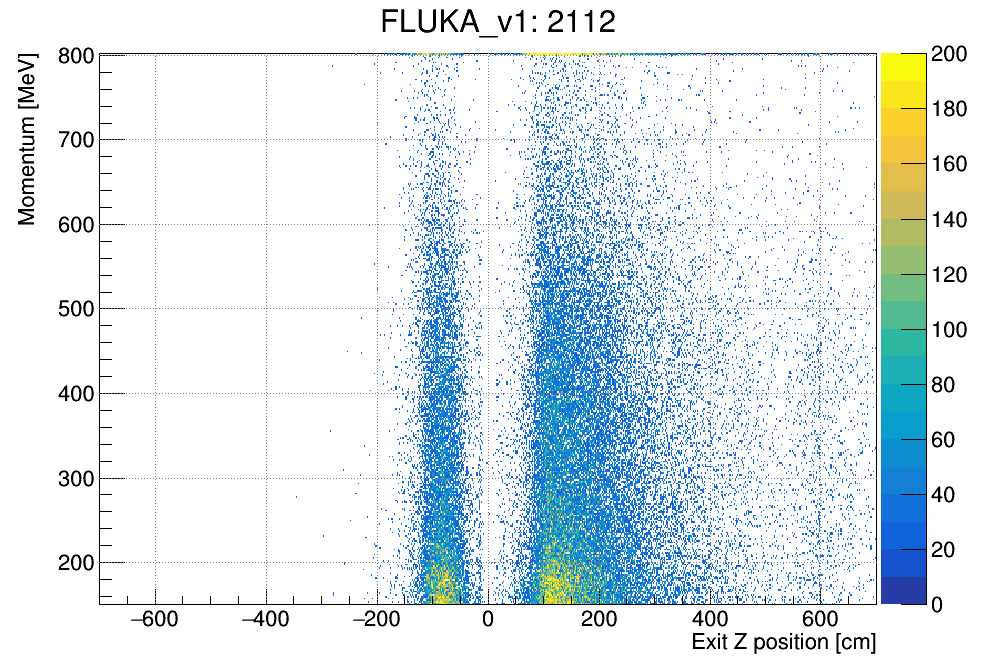

In [55]:
z_max = {2112: 2e2, 22: 1e6, 11: 8e3}
for p in pdgs:
    for f, fname in {0: 'FLUKA_v2', 1: 'FLUKA_v1', 2: 'MARS15'}.items():
        h = histos[(p, f)].Clone()
        h.SetTitle(f'{fname}: {p:d}')
        h.SetAxisRange(0, z_max[p], 'Z')
        h.SetAxisRange(150, 800, 'Y')
        h.Draw('colz')
        C.Draw()
        C.Print(os.path.join(DIR_IN, f'../plots/t_lt15ns_e_gt150MeV/z_e_{p}_{fname}_v3.pdf'))

### Exit position vs azimuthal angle

In [143]:
pdgs = [2112, 22, 11]
histos = {(p, f): R.TH2F('h2{0:d}_{1:d}'.format(p, f), ';Exit Z position [cm];#Theta [deg]', 600, -300, 300, 180, 0, 180) for p in pdgs for f in range(len(trees))}

for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('TMath::ATan2(sqrt(mcmox*mcmox + mcmoy*mcmoy), mcmoz)*TMath::RadToDeg():mcvtz/10.0>>h2{0:d}_{1:d}'.format(pdg, iF), 'abs(mcpdg) == {0:d} && mctim < 15'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 2112 6470549
1 0 22 40675701
2 0 11 744433
0 1 2112 7734067
1 1 22 42530821
2 1 11 770193
0 2 2112 6035726
1 2 22 31083441
2 2 11 428677


Warning in <TFile::Append>: Replacing existing TH1: h222_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h222_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h222_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h211_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h211_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h211_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h211_2 (Potential memory leak).


In [144]:
C = R.TCanvas('c2d', '', 1000, 700)
C.SetGrid(1,1)
C.SetTopMargin(0.08)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.12)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2d


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_theta_2112_FLUKA_v2.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_theta_2112_FLUKA_v1.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_theta_2112_MARS15.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_theta_22_FLUKA_v2.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_theta_22_FLUKA_v1.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_theta_22_MARS15

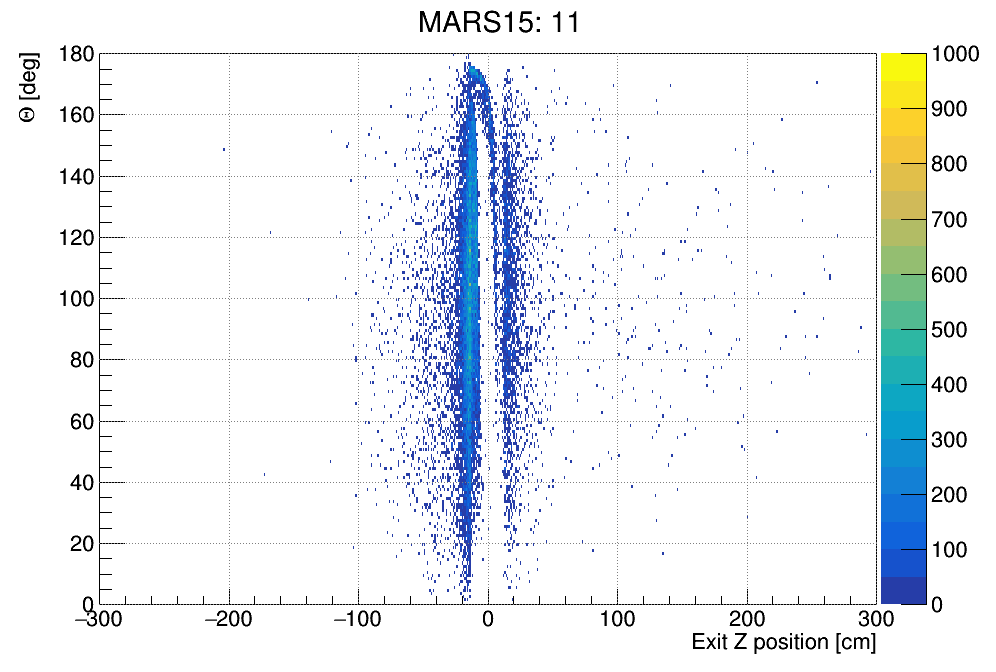

In [145]:
z_max = {2112: 1e3, 22: 40e3, 11: 1e3}
for p in pdgs:
    for f, fname in {0: 'FLUKA_v2', 1: 'FLUKA_v1', 2: 'MARS15'}.items():
        h = histos[(p, f)].Clone()
        h.SetTitle(f'{fname}: {p:d}')
        h.SetAxisRange(0, z_max[p], 'Z')
        h.Draw('colz')
        C.Draw()
        C.Print(os.path.join(DIR_IN, f'../plots/t_lt15ns/z_theta_{p}_{fname}.pdf'))

### Exit position vs arrival time

In [139]:
pdgs = [22, 11]
histos = {(p, f): R.TH2F('h2{0:d}_{1:d}'.format(p, f), ';Exit Z position [cm];Time [ns]', 400, -50, 50, 300, -2, 4) for p in pdgs for f in range(len(trees))}

for iF, tree in enumerate(trees):
    for iP, pdg in enumerate(pdgs):
        nev = tree.Draw('mctim:mcvtz/10.0>>h2{0:d}_{1:d}'.format(pdg, iF), 'abs(mcpdg) == {0:d} && mctim < 15'.format(pdg), 'goff')
        print(iP, iF, pdg, nev)

0 0 22 40675701
1 0 11 744433
0 1 22 42530821
1 1 11 770193
0 2 22 31083441
1 2 11 428677


Warning in <TFile::Append>: Replacing existing TH1: h222_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h222_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h222_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h211_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h211_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h211_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h211_2 (Potential memory leak).


In [132]:
C = R.TCanvas('c2d', '', 1000, 700)
C.SetGrid(1,1)
C.SetTopMargin(0.08)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.12)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2d


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_t_22_FLUKA_v2.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_t_22_FLUKA_v1.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_t_22_MARS15.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_t_11_FLUKA_v2.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_t_11_FLUKA_v1.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/../plots/t_lt15ns/z_t_11_MARS15.pdf has been created


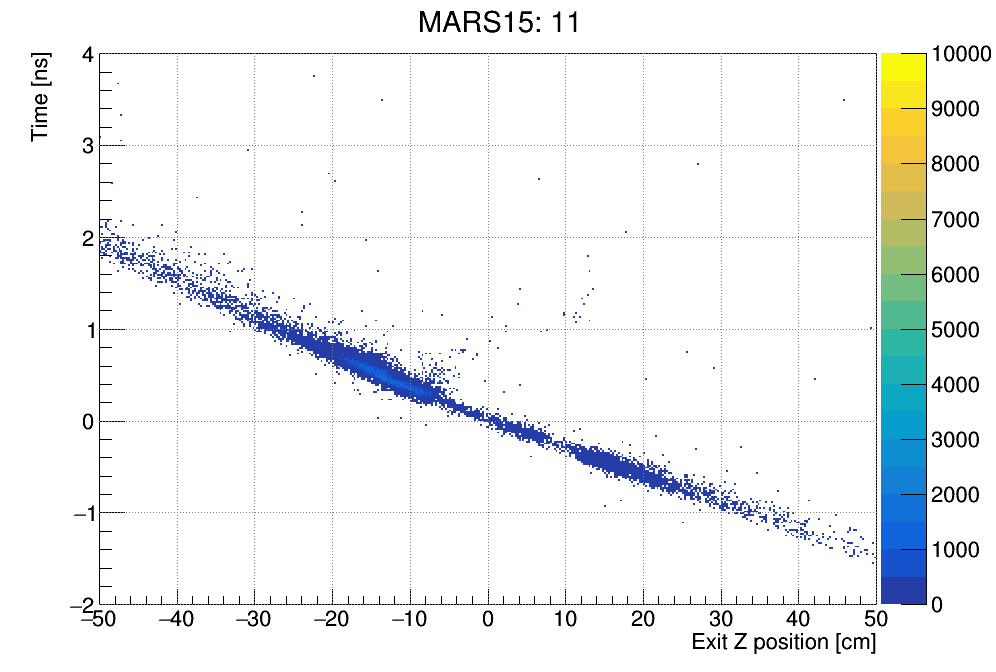

In [142]:
z_max = {2112: 1e3, 22: 160e3, 11: 10e3}
for p in pdgs:
    for f, fname in {0: 'FLUKA_v2', 1: 'FLUKA_v1', 2: 'MARS15'}.items():
        h = histos[(p, f)].Clone()
        h.SetTitle(f'{fname}: {p:d}')
        h.SetAxisRange(0, z_max[p], 'Z')
        h.Draw('colz')
        C.Draw()
        C.Print(os.path.join(DIR_IN, f'../plots/t_lt15ns/z_t_{p}_{fname}.pdf'))

### Drawing tracker hit time distributions

In [17]:
for f in files_in:
    f.Close()
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_digi'
FILES_IN = [os.path.join(DIR_IN, p) for p in ['fluka/1p5TeV_v4_10ns_merge.root', 'mars15/all_merge.root']]
files_in = [R.TFile(fIn) for fIn in FILES_IN]
trees = [fIn.Get('MyLCTuple') for fIn in files_in]
# # Adding hits from IP muons
# files_in.append(R.TFile('/Users/nbartosi/cernbox/work/mu_collider/data/2021_06_12_vchep/slcio/pgun_mu_tuple_trk.root'))
# trees.append(files_in[-1].Get('MyLCTuple'))

In [18]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} - TOF_{photon} [ns];Hits', 1100, -1, 10) for i in range(6)]
cmd = 'thtim'
sel = ''
# trees[-1].Draw(cmd + ' >> h_0', 'thori > 2', 'goff')  # IP muons in TRK
# trees[-1].Draw(cmd + ' >> h_1', 'thori <= 2', 'goff')  # IP muons in VXD
trees[0].Draw(cmd + ' >> h_2', 'thori <= 2'+sel, 'goff')  # BIB in VXD: FLUKA
trees[1].Draw(cmd + ' >> h_3', 'thori <= 2'+sel, 'goff')  # BIB in VXD: MARS15
trees[0].Draw(cmd + ' >> h_4', 'thori > 2'+sel, 'goff')  # BIB in TRK: FLUKA
trees[1].Draw(cmd + ' >> h_5', 'thori > 2'+sel, 'goff')  # BIB in TRK: MARS15

902656

In [19]:
C = R.TCanvas('ctime', '', 1000, 700)
C.SetGrid(1,1)
C.SetTopMargin(0.05)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.05)

In [20]:
colors = [18, 16,  R.kAzure+7, R.kAzure-9,  2, R.kRed-9]

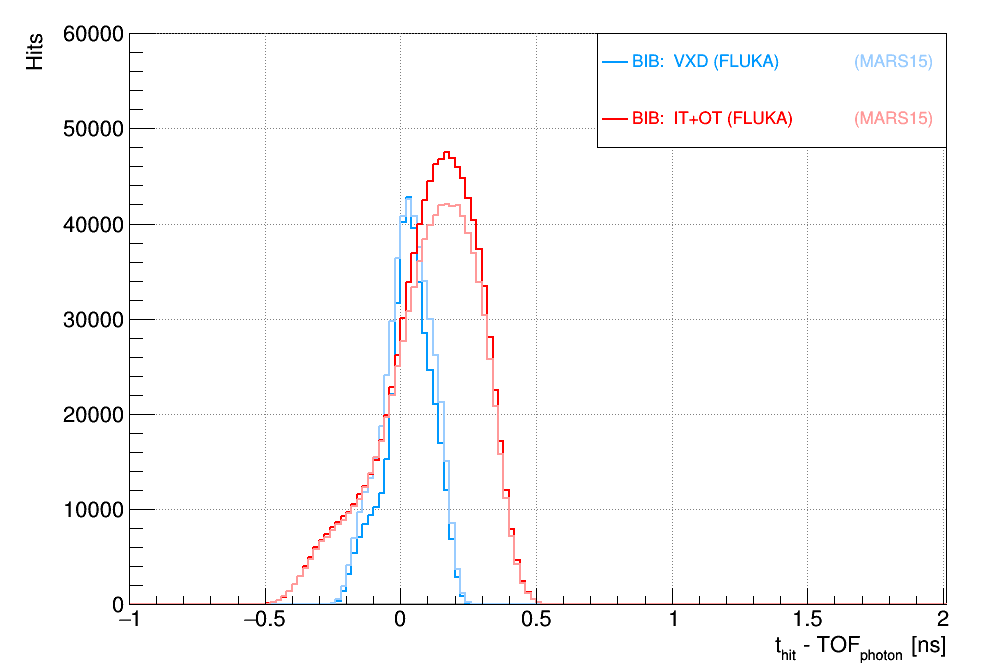

In [25]:
leg = R.TLegend(0.6,0.78, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['IP muons: IT+OT (#sigma_{t} = 60ps)', 'VXD (#sigma_{t} = 30ps)', 'BIB:  VXD (FLUKA)', '(MARS15)', 'BIB:  IT+OT (FLUKA)', '(MARS15)']
l1 = R.TLine(-0.09, 0, -0.09, 1.04)
l2 = R.TLine(0.09, 0, 0.09, 1.04)
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
    if iH > 1:
        h.Rebin(2)
    if iH < 2:
        h.Scale(9e4/max(h.GetMaximum(), 1.0))
#     h.Scale(1.0/max(h.GetMaximum(), 1.0))
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH < 2:
        h.SetFillColor(colors[iH])
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(-1, 2, 'X')
#         h.SetAxisRange(0, 1.1, 'Y')
        h.SetAxisRange(0, 6e4, 'Y')
#     if iH < 2:
#         leg.AddEntry(h, titles[iH], 'F')
    elif iH % 2 == 1:
        leg.AddEntry(h, titles[iH], '').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
    h.Draw('hist'+opt)
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
# C.SaveAs(os.path.join(DIR_IN, '../plots/hit_time_trk.pdf'))

### Raw simhit time

In [27]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} [ns];Endcap SimHits', 1100, -1, 10) for i in range(4)]
cmd = 'sttim'
trees[0].Draw(cmd + ' >> h_0', 'stori == 2', 'goff')  # BIB in VXD: FLUKA
trees[1].Draw(cmd + ' >> h_1', 'stori == 2', 'goff')  # BIB in VXD: MARS15
trees[0].Draw(cmd + ' >> h_2', 'stori == 4', 'goff')  # BIB in TRK: FLUKA
trees[1].Draw(cmd + ' >> h_3', 'stori == 4', 'goff')  # BIB in TRK: MARS15

194490

Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_digi/../plots/digi/simhit_time_trk_endcap_zoomin_v4.pdf has been created


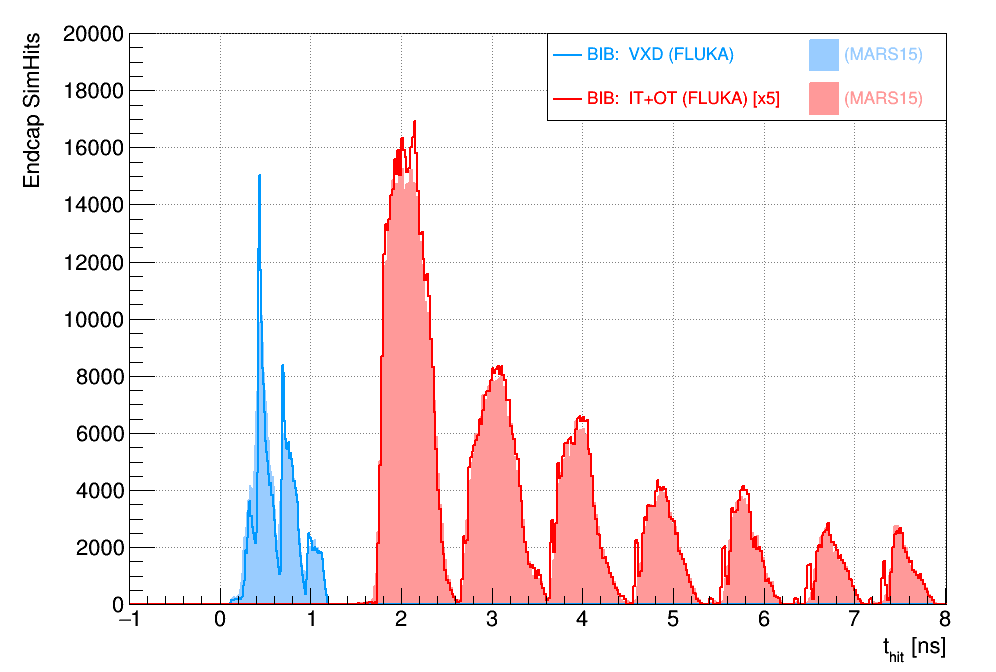

In [28]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.55,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  VXD (FLUKA)', '(MARS15)  ', 'BIB:  IT+OT (FLUKA) [x5]', '(MARS15)  ']
l1 = R.TLine(-0.09, 0, -0.09, 1.04)
l2 = R.TLine(0.09, 0, 0.09, 1.04)
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
h_drawn = []
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
    if iH > 1:
        h.Rebin(2)
    if iH > 1:
        h.Scale(5.0)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(-1, 8, 'X')
        h.SetAxisRange(0, 20e3, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], 'F').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
    if iH%2 == 1:
        h.SetFillColor(colors[iH])
    h.Draw('hist'+opt)
    h_drawn.append(h)
for iH in [0,2]:
    h_drawn[iH].Draw('hist same')
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, '../plots/digi/simhit_time_trk_endcap_zoomin_v4.pdf'))

In [50]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} [ns];Barrel SimHits', 1100, -1, 10) for i in range(4)]
cmd = 'sttim'
sel = '&& int(thci0/128)%64 == 1'
trees[0].Draw(cmd + ' >> h_0', 'stori == 1'+sel, 'goff')  # BIB in VXD: FLUKA
trees[1].Draw(cmd + ' >> h_1', 'stori == 1'+sel, 'goff')  # BIB in VXD: MARS15
trees[0].Draw(cmd + ' >> h_2', 'stori == 3'+sel, 'goff')  # BIB in TRK: FLUKA
trees[1].Draw(cmd + ' >> h_3', 'stori == 3'+sel, 'goff')  # BIB in TRK: MARS15

170579

Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: 

Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_digi/../plots/digi/simhit_time_trk_barrel_l1_v4.pdf has been created


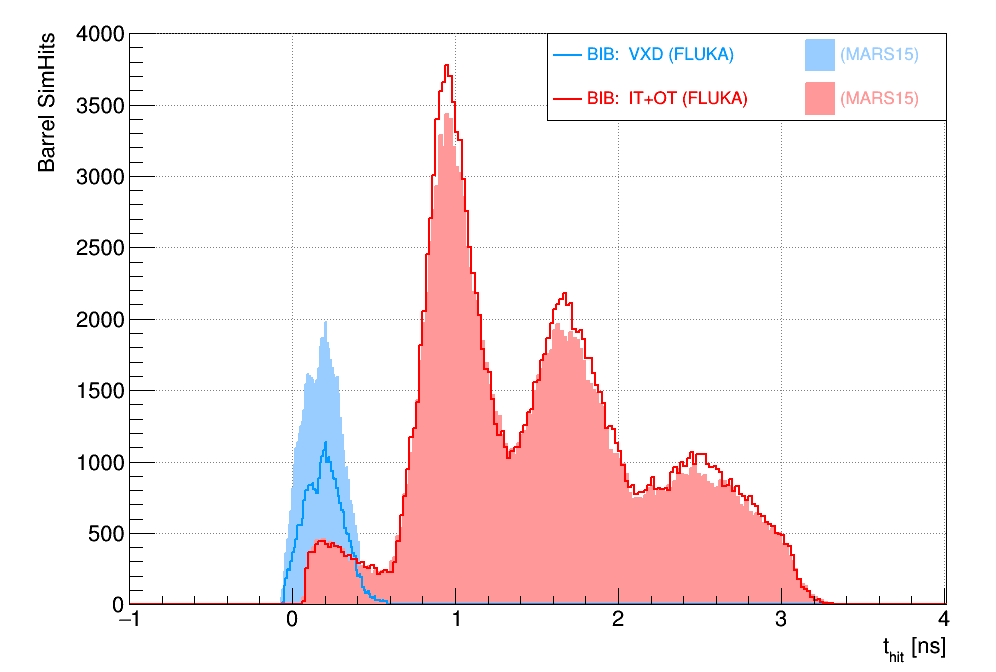

In [52]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.55,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  VXD (FLUKA)', '(MARS15)', 'BIB:  IT+OT (FLUKA)', '(MARS15)']
l1 = R.TLine(-0.09, 0, -0.09, 1.04)
l2 = R.TLine(0.09, 0, 0.09, 1.04)
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
h_drawn = []
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
    if iH > 1:
        h.Rebin(2)
#     if iH > 1:
#         h.Scale(5.0)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(-1, 4, 'X')
#         h.SetAxisRange(0, 16e3, 'Y')
        h.SetAxisRange(0, 4e3, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], 'F').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
    if iH%2 == 1:
        h.SetFillColor(colors[iH])
    h.Draw('hist'+opt)
    h_drawn.append(h)
for iH in [0,2]:
    h_drawn[iH].Draw('hist same')
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, '../plots/digi/simhit_time_trk_barrel_l1_v4.pdf'))

### TOF-corrected simhit time

In [32]:
for f in files_in:
    f.Close()
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit'
FILES_IN = [os.path.join(DIR_IN, p) for p in ['fluka/1p5TeV_v3_tuple_trk.root', 'mars15/mumi-1e3x500-26m-lowth-excl_tuple_trk.root']]
files_in = [R.TFile(fIn) for fIn in FILES_IN]
trees = [fIn.Get('MyLCTuple') for fIn in files_in]
# # Adding hits from IP muons
# files_in.append(R.TFile('/Users/nbartosi/cernbox/work/mu_collider/data/2021_06_12_vchep/slcio/pgun_mu_tuple_trk.root'))
# trees.append(files_in[-1].Get('MyLCTuple'))

In [33]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} - TOF_{photon} [ns];Endcap SimHits', 800, -0.4, 0.4) for i in range(4)]
cmd = 'sttim - sqrt(stpox*stpox + stpoy*stpoy + stpoz*stpoz)/TMath::C() * 1e6'
sel = ' && int(stci0/128)%64 <= 1'
trees[0].Draw(cmd + ' >> h_0', 'stori == 2'+sel, 'goff')  # BIB in VXD: FLUKA
trees[1].Draw(cmd + ' >> h_1', 'stori == 2'+sel, 'goff')  # BIB in VXD: MARS15
trees[0].Draw(cmd + ' >> h_2', 'stori == 4'+sel, 'goff')  # BIB in TRK: FLUKA
trees[1].Draw(cmd + ' >> h_3', 'stori == 4'+sel, 'goff')  # BIB in TRK: MARS15

429678

Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit/../plots/digi/simhit_time_tof_trk_endcap_zoomin_v3.pdf has been created


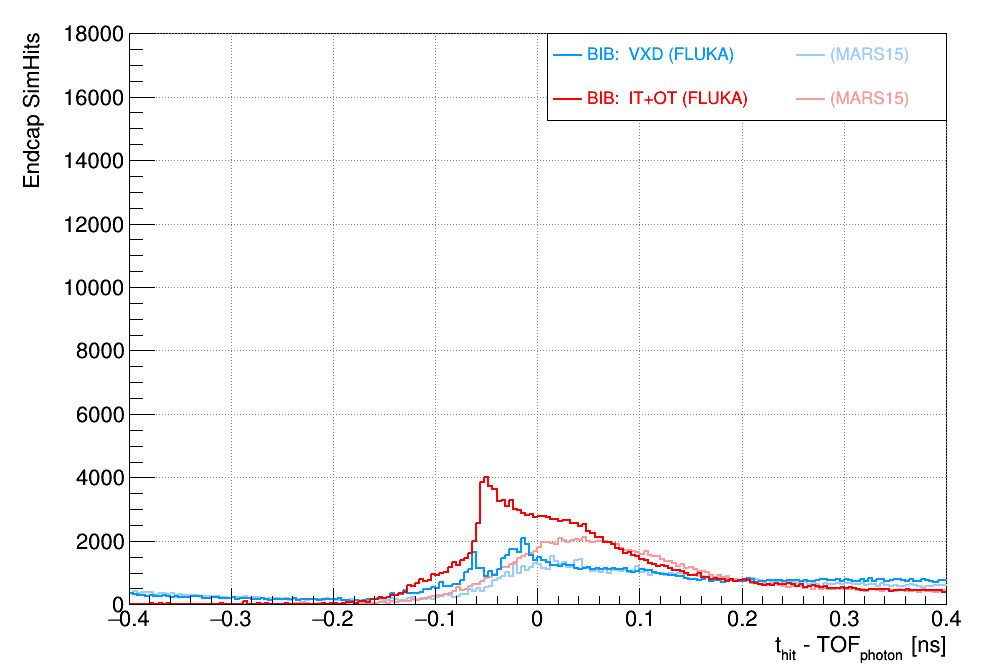

In [34]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.55,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  VXD (FLUKA)', '(MARS15)  ', 'BIB:  IT+OT (FLUKA)', '(MARS15)  ']
l1 = R.TLine(-0.09, 0, -0.09, 1.04)
l2 = R.TLine(0.09, 0, 0.09, 1.04)
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
h_drawn = []
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
#     if iH > 1:
    h.Rebin(4)
#     if iH > 1:
#         h.Scale(2.0)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
#         h.SetAxisRange(-1, 8, 'X')
        h.SetAxisRange(0, 18e3, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
#     if iH%2 == 1:
#         h.SetFillColor(colors[iH])
    h.Draw('hist'+opt)
    h_drawn.append(h)
for iH in [0,2]:
    h_drawn[iH].Draw('hist same')
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, '../plots/digi/simhit_time_tof_trk_endcap_zoomin_v3.pdf'))

In [276]:
histos = [R.TH2F('h_{0:d}'.format(i), ';t_{hit} - TOF_{photon} [ns];Z [mm]', 800, -6, 6, 500, -2500, 2500) for i in range(4)]
cmd = 'stpoz:(sttim - sqrt(stpox*stpox + stpoy*stpoy + stpoz*stpoz)/TMath::C() * 1e6)'
# sel = ' && int(stci0/128)%64 <= 1'
sel = ''
# trees[0].Draw(cmd + ' >> h_0', 'stori == 2'+sel, 'goff')  # BIB in VXD: FLUKA
# trees[1].Draw(cmd + ' >> h_1', 'stori == 2'+sel, 'goff')  # BIB in VXD: MARS15
trees[0].Draw(cmd + ' >> h_2', 'stori == 4'+sel, 'goff')  # BIB in TRK: FLUKA
trees[1].Draw(cmd + ' >> h_3', 'stori == 4'+sel, 'goff')  # BIB in TRK: MARS15

1289529

Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


In [277]:
C = R.TCanvas('ctime', '', 1000, 700)
C.SetGrid(1,1)
C.SetTopMargin(0.05)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.12)
C.SetLogz(False)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctime


In [278]:
h_drawn = []
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
    h.GetXaxis().SetTitleOffset(1.2)
#     h.SetAxisRange(-1, 8, 'X')
    h.SetAxisRange(0, 700, 'Z')
    h.Draw('colz')
    C.RedrawAxis()
#     C.Draw()
    C.SaveAs(os.path.join(DIR_IN, f'../plots/digi/simhit_time_z_trk_endcap_{iH}.pdf'))

Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit/../plots/digi/simhit_time_z_trk_endcap_0.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit/../plots/digi/simhit_time_z_trk_endcap_1.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit/../plots/digi/simhit_time_z_trk_endcap_2.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit/../plots/digi/simhit_time_z_trk_endcap_3.pdf has been created


In [269]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} - TOF_{photon} [ns];Barrel SimHits', 800, -2, 2) for i in range(4)]
cmd = 'sttim - sqrt(stpox*stpox + stpoy*stpoy + stpoz*stpoz)/TMath::C() * 1e6'
sel = ' && int(stci0/128)%64 >= 6'
trees[0].Draw(cmd + ' >> h_0', 'stori == 1'+sel, 'goff')  # BIB in VXD: FLUKA
trees[1].Draw(cmd + ' >> h_1', 'stori == 1'+sel, 'goff')  # BIB in VXD: MARS15
trees[0].Draw(cmd + ' >> h_2', 'stori == 3'+sel, 'goff')  # BIB in TRK: FLUKA
trees[1].Draw(cmd + ' >> h_3', 'stori == 3'+sel, 'goff')  # BIB in TRK: MARS15

0

Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


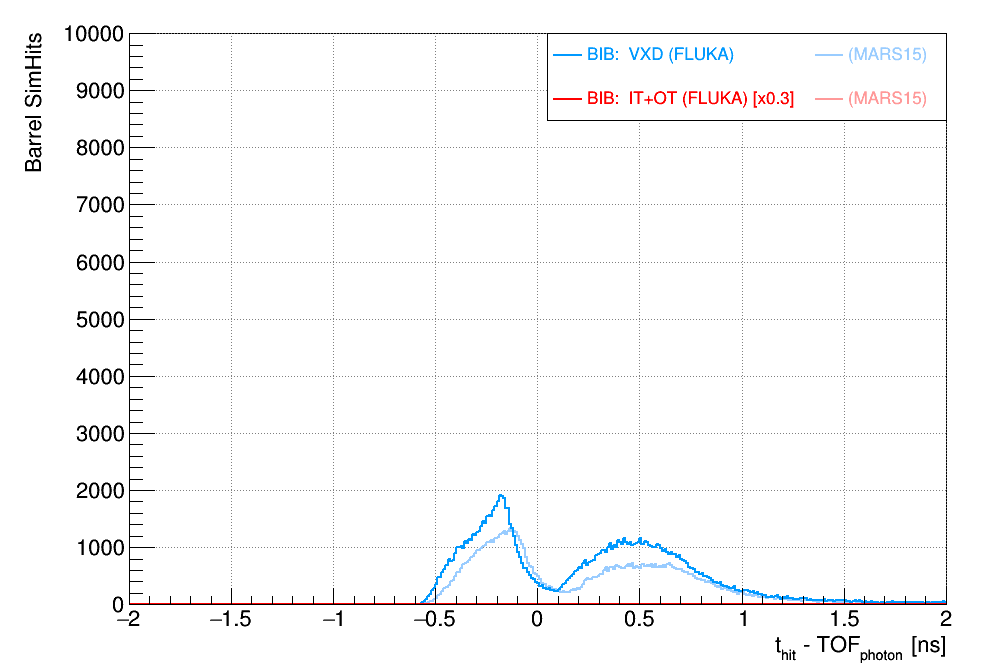

In [239]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.55,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  VXD (FLUKA)', '(MARS15)  ', 'BIB:  IT+OT (FLUKA) [x0.3]', '(MARS15)  ']
l1 = R.TLine(-0.09, 0, -0.09, 1.04)
l2 = R.TLine(0.09, 0, 0.09, 1.04)
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
h_drawn = []
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
#     if iH > 1:
    h.Rebin(2)
    if iH > 1:
        h.Scale(0.3)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
#         h.SetAxisRange(-1, 8, 'X')
        h.SetAxisRange(0, 10e3, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
#     if iH%2 == 1:
#         h.SetFillColor(colors[iH])
    h.Draw('hist'+opt)
    h_drawn.append(h)
for iH in [0,2]:
    h_drawn[iH].Draw('hist same')
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
# C.SaveAs(os.path.join(DIR_IN, '../plots/digi/simhit_time_tof_trk_barrel_zoomin.pdf'))

### Drawing calorimeter hit time distributions

In [55]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} - TOF_{photon} [ns];Barrel Hits (E_{hit} weighted) [MeV]', 1100, -1, 10) for i in range(4)]
cmd = 'catim'
sel='*(catim > -0.15 && catim < 10)'
trees[0].Draw(cmd + ' >> h_0', '(caori == 1)*caene*1e3'+sel, 'goff')  # BIB in ECAL: FLUKA
trees[1].Draw(cmd + ' >> h_1', '(caori == 1)*caene*1e3'+sel, 'goff')  # BIB in ECAL: MARS15
trees[0].Draw(cmd + ' >> h_2', '(caori == 3)*caene*1e3'+sel, 'goff')  # BIB in HCAL: FLUKA
trees[1].Draw(cmd + ' >> h_3', '(caori == 3)*caene*1e3'+sel, 'goff')  # BIB in HCAL: MARS15

89561

Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


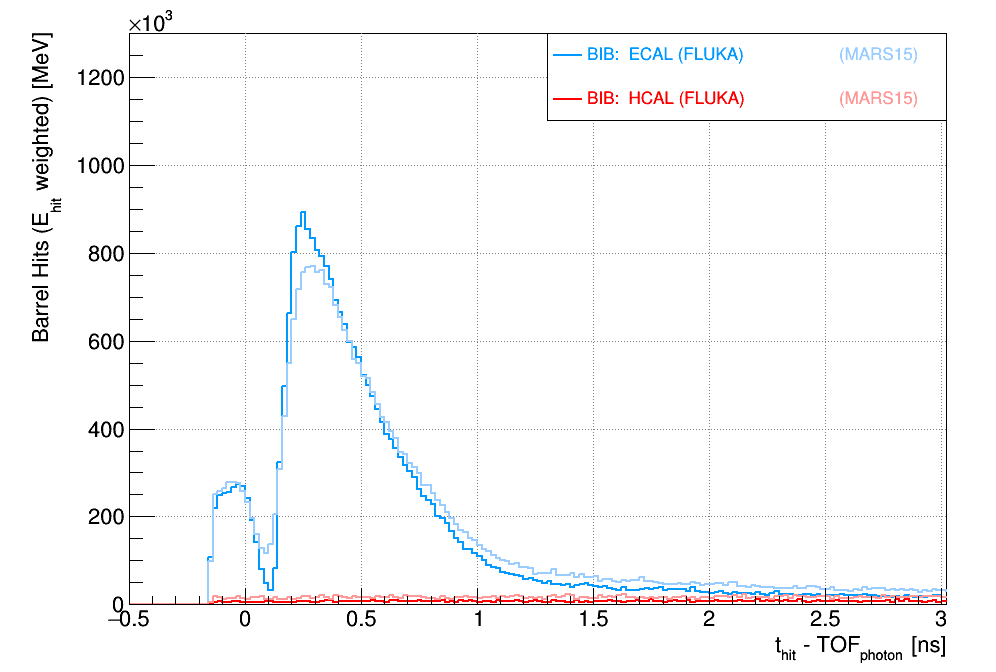

In [56]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.55,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  ECAL (FLUKA)', '(MARS15)', 'BIB:  HCAL (FLUKA)', '(MARS15)']
l1 = R.TLine(-0.09, 0, -0.09, 1.04)
l2 = R.TLine(0.09, 0, 0.09, 1.04)
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
#     if iH > 1:
    h.Rebin(2)
#     if iH > 1:
#         h.Scale(5.0)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(-0.5, 3, 'X')
        h.SetAxisRange(0, 1.3e6, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], '').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
    h.Draw('hist'+opt)
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
# C.SaveAs(os.path.join(DIR_IN, '../plots/digi/hit_time_cal_barrel_v4.pdf'))

In [33]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} - TOF_{photon} [ns];Endcap Hits (E_{hit} weighted) [MeV]', 1100, -1, 10) for i in range(4)]
cmd = 'catim'
trees[0].Draw(cmd + ' >> h_0', '(caori == 2)*caene*1e3', 'goff')  # BIB in ECAL: FLUKA
trees[1].Draw(cmd + ' >> h_1', '(caori == 2)*caene*1e3', 'goff')  # BIB in ECAL: MARS15
trees[0].Draw(cmd + ' >> h_2', '(caori >= 4)*caene*1e3', 'goff')  # BIB in HCAL: FLUKA
trees[1].Draw(cmd + ' >> h_3', '(caori >= 4)*caene*1e3', 'goff')  # BIB in HCAL: MARS15

53462

Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_digi/../plots/digi/hit_time_cal_endcap_v4.pdf has been created


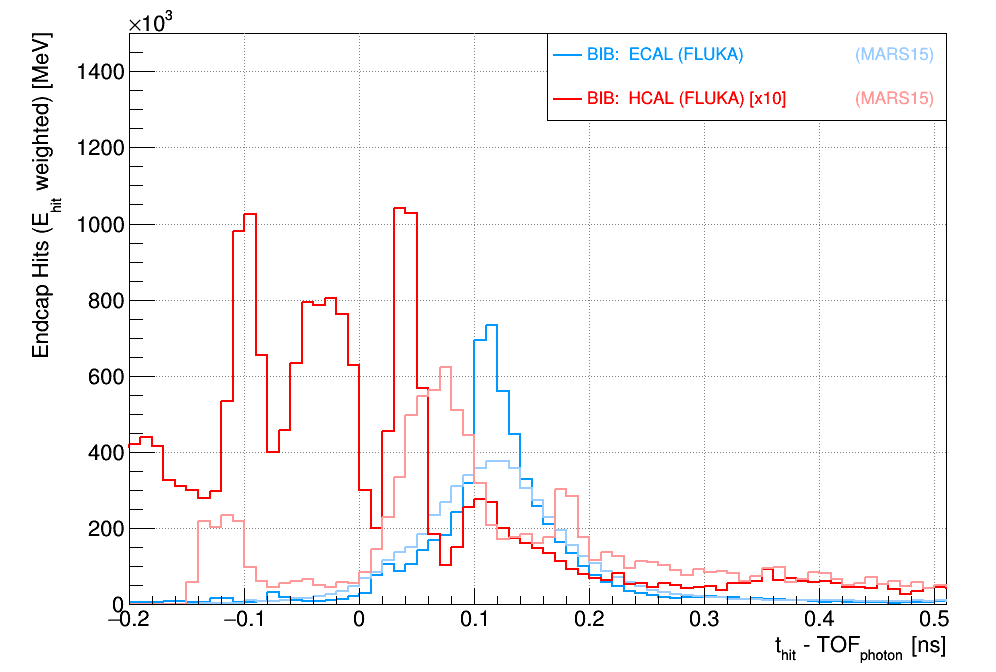

In [34]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.55,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  ECAL (FLUKA)', '(MARS15)', 'BIB:  HCAL (FLUKA) [x10]', '(MARS15)']
l1 = R.TLine(-0.09, 0, -0.09, 1.04)
l2 = R.TLine(0.09, 0, 0.09, 1.04)
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
#     if iH > 1:
#     h.Rebin(2)
    if iH > 1:
        h.Scale(10.0)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(-0.2, 0.5, 'X')
        h.SetAxisRange(0, 1.5e6, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], '').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
    h.Draw('hist'+opt)
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, '../plots/digi/hit_time_cal_endcap_v4.pdf'))

In [35]:
histos = [R.TH1F('h_{0:d}'.format(i), ';Longitudinal hit position [mm];ECAL Barrel hits [a.u.]', 70, -50, 300) for i in range(2)]

cmd = 'sqrt(capox*capox + capoy*capoy) - 1500'
# cmd = 'sqrt(capox*capox + capoy*capoy) - 1760'
print(trees[1].Draw(cmd + ' >> h_0', '(caori == 1 && abs(catim) < 0.25)*caene', 'goff'))
# print(trees[0].Draw(cmd + ' >> h_0', 'caori == 3', 'goff'))
print(trees[0].Draw(cmd + ' >> h_1', '(caori == 1 && abs(catim) < 0.25)*caene', 'goff'))
# print(trees[1].Draw(cmd + ' >> h_1', 'caori == 3', 'goff'))

398165
485774


Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).


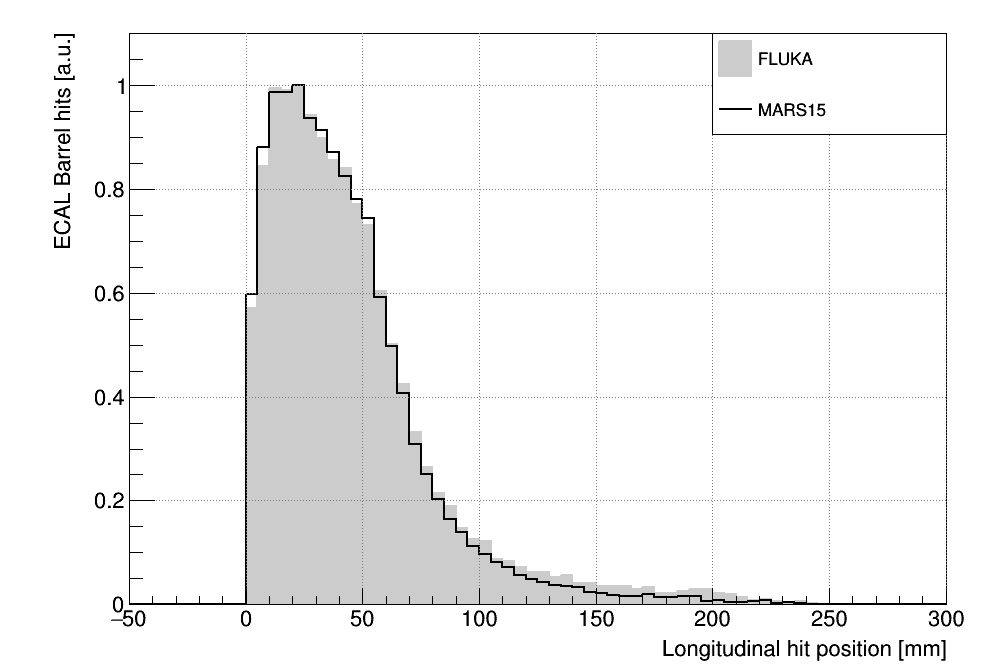

In [36]:
colors = [ 17, 1]
leg = R.TLegend(0.715,0.8, 0.95,0.95)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['FLUKA', 'MARS15']
ah = None
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
#     if iH > 1:
#         h.Rebin(2)
    h.Scale(1.0/h.GetMaximum())
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.SetFillColor(colors[iH])
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(0, 1.1, 'Y')
        ah = h
    if iH == 0:
        leg.AddEntry(h, titles[iH], 'F')
    else:
        leg.AddEntry(h, titles[iH], 'L')
    opt = '' if iH == 0 else 'same'
    h.Draw('hist'+opt)
ah.Draw('AXIG same')
C.RedrawAxis()
leg.Draw()
C.Draw()
# C.SaveAs(os.path.join(DIR_IN, '../plots/hit_depth_ecal_endcap.pdf'))

### Calorimeter energy distribution

In [106]:
histos = [R.TH1F('h_{0:d}'.format(i), ';Hit energy [MeV];Calorimeter hits', 500, 0, 500) for i in range(4)]

cmd = 'caene*1e3'
sel = '*(catim > -0.15 && catim < 10)'
print(trees[0].Draw(cmd + ' >> h_0', '(caori == 1)'+sel, 'goff')) # ECAL FLUKA
print(trees[1].Draw(cmd + ' >> h_1', '(caori == 1)'+sel, 'goff')) # ECAL MARS15
print(trees[0].Draw(cmd + ' >> h_2', '(caori == 3)'+sel, 'goff')) # HCAL FLUKA
print(trees[1].Draw(cmd + ' >> h_3', '(caori == 3)'+sel, 'goff')) # HCAL MARS15

2091691
2239042
46809
89561


Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_digi/../plots/digi/hit_energy_cal_barrel_v4.pdf has been created


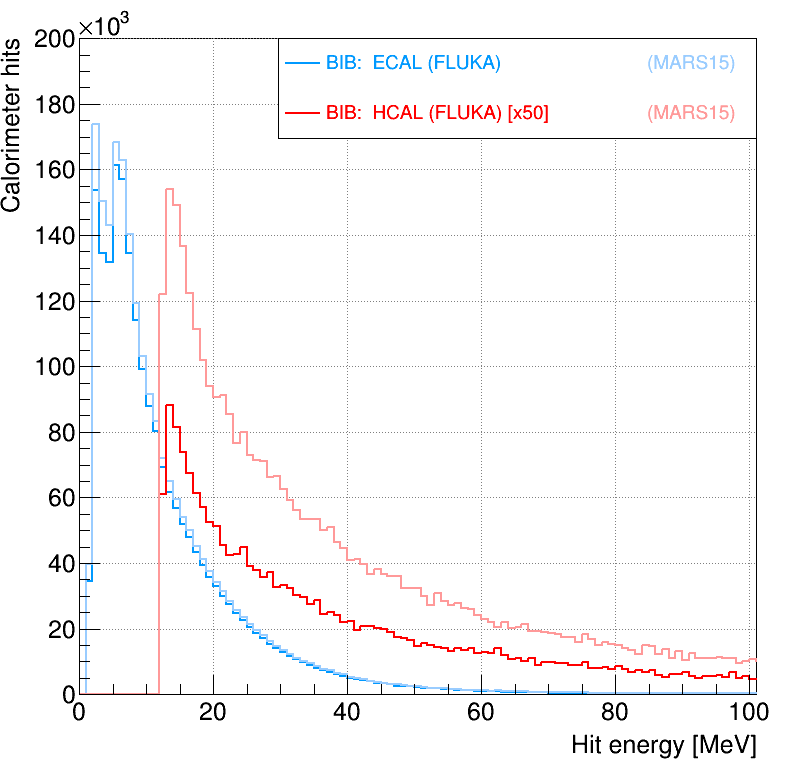

In [108]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.35,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  ECAL (FLUKA)', '(MARS15)', 'BIB:  HCAL (FLUKA) [x50]', '(MARS15)']
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
    if iH > 1:
        h.Scale(50.0)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(0.0, 100, 'X')
#         h.SetAxisRange(0, 30e4, 'Y')
        h.SetAxisRange(0, 20e4, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], '').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
    h.Draw('hist'+opt)
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, '../plots/digi/hit_energy_cal_barrel_v4.pdf'))

In [90]:
C = R.TCanvas('ctime', '', 800, 800)
C.SetGrid(1,1)
C.SetTopMargin(0.05)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.05)
C.SetLogz(False)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctime


In [99]:
histos = [R.TH1F('h_{0:d}'.format(i), ';Hit energy [MeV];Calorimeter hits', 500, 0, 500) for i in range(4)]

cmd = 'caene*1e3'
print(trees[0].Draw(cmd + ' >> h_0', 'caori == 2', 'goff')) # ECAL FLUKA
print(trees[1].Draw(cmd + ' >> h_1', 'caori == 2', 'goff')) # ECAL MARS15
print(trees[0].Draw(cmd + ' >> h_2', 'caori == 4', 'goff')) # HCAL FLUKA
print(trees[1].Draw(cmd + ' >> h_3', 'caori == 4', 'goff')) # HCAL MARS15

2368777
2239042
49032
89561


Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_digi/../plots/hit_energy_cal_barrel_v4.pdf has been created


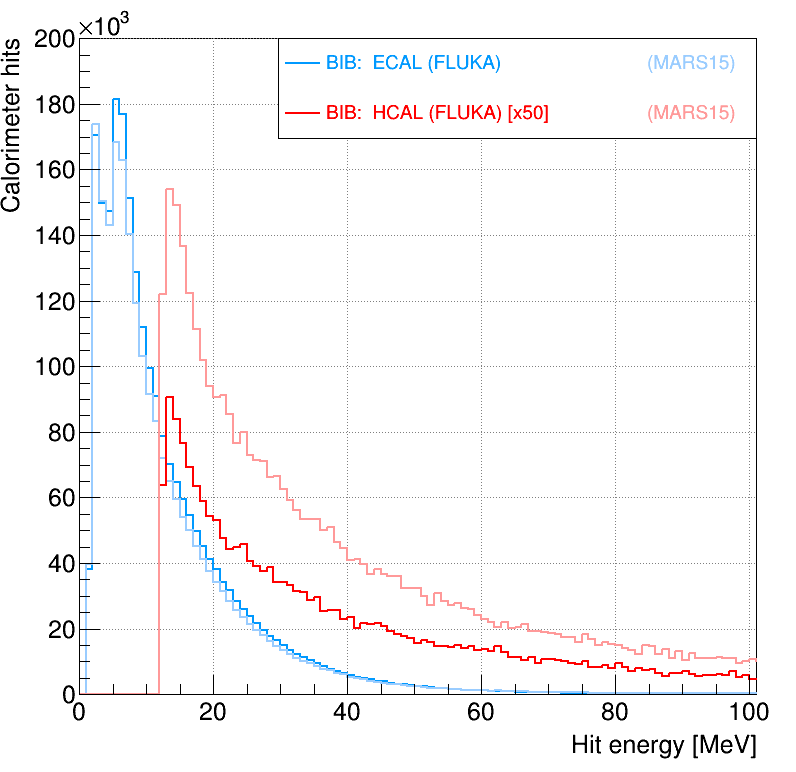

In [101]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.35,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  ECAL (FLUKA)', '(MARS15)', 'BIB:  HCAL (FLUKA) [x50]', '(MARS15)']
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
    if iH > 1:
        h.Scale(50.0)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(0.0, 100, 'X')
        h.SetAxisRange(0, 20e4, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], '').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
    h.Draw('hist'+opt)
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, '../plots/hit_energy_cal_barrel_v4.pdf'))

### Drawing general hit time distributions

In [47]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} - TOF_{photon} [ns];Hits [a.u.]', 120, -20, 100) for i in range(3)]

print(trees[0].Draw('sttim - sqrt(stpox*stpox + stpoy*stpoy + stpoz*stpoz)/299.8e3 >> h_0', '', 'goff'))
print(trees[0].Draw('catim >> h_1', 'caori <= 2', 'goff'))
print(trees[0].Draw('catim >> h_2', 'caori > 2', 'goff'))

2091202
3098509
128309


Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).


Info in <TCanvas::Print>: eps file /Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_digi/../plots/bib_hit_time_v3.eps has been created


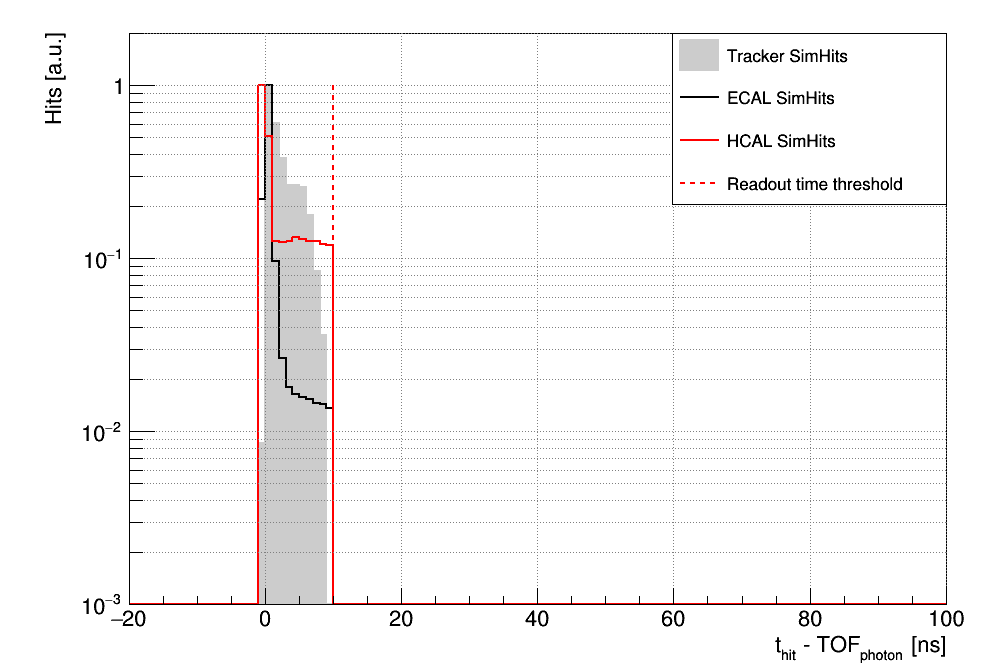

In [48]:
colors = [ 17, 1, 2]
leg = R.TLegend(0.675,0.695, 0.95,0.95)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['Tracker SimHits', 'ECAL SimHits', 'HCAL SimHits']
l1 = R.TLine(10, 0, 10, 1.0)
C.SetLogy(True)
ha = None
for l in [l1]:
    l.SetLineColor(2)
    l.SetLineWidth(2)
    l.SetLineStyle(7)
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
#     if iH > 1:
#         h.Rebin(2)
    h.Scale(1.0/h.GetMaximum())
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.SetFillColor(colors[iH])
        h.GetXaxis().SetTitleOffset(1.2)
        h.SetAxisRange(1e-3, 2, 'Y')
        ha = h
    if iH == 0:
        leg.AddEntry(h, titles[iH], 'F')
    else:
        leg.AddEntry(h, titles[iH], 'L')
    opt = '' if iH == 0 else 'same'
    h.Draw('hist'+opt)
ha.Draw('AXIG same')
leg.AddEntry(l1, 'Readout time threshold', 'L')
leg.Draw()
l1.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, '../plots/bib_hit_time_v3.eps'))

### Tracker-hit origins

In [7]:
for f in files_in:
    f.Close()
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit'
FILES_IN = [os.path.join(DIR_IN, p) for p in ['fluka/1p5TeV_v2_trkHits.root', 'mars15/mumi-1e3x500-26m-lowth-excl_trkHits.root']]
files_in = [R.TFile(fIn) for fIn in FILES_IN]
trees = [fIn.Get('MyLCTuple') for fIn in files_in]
# # Adding hits from IP muons
# files_in.append(R.TFile('/Users/nbartosi/cernbox/work/mu_collider/data/2021_06_12_vchep/slcio/pgun_mu_tuple_trk.root'))
# trees.append(files_in[-1].Get('MyLCTuple'))

In [240]:
histos = [R.TH1F('h_{0:d}'.format(i), ';t_{hit} - TOF_{photon} [ns];Barrel SimHits', 800, -0.4, 0.4) for i in range(4)]
cmd = 'time - time0'
sel = ' && int(stci0/128)%64 <= 1'
trees[0].Draw(cmd + ' >> h_0', 'col_id == 2'+sel, 'goff')  # BIB in VXD: FLUKA
trees[1].Draw(cmd + ' >> h_1', 'col_id == 2'+sel, 'goff')  # BIB in VXD: MARS15
trees[0].Draw(cmd + ' >> h_2', 'col_id == 4'+sel, 'goff')  # BIB in TRK: FLUKA
trees[1].Draw(cmd + ' >> h_3', 'col_id == 4'+sel, 'goff')  # BIB in TRK: MARS15

429678

Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


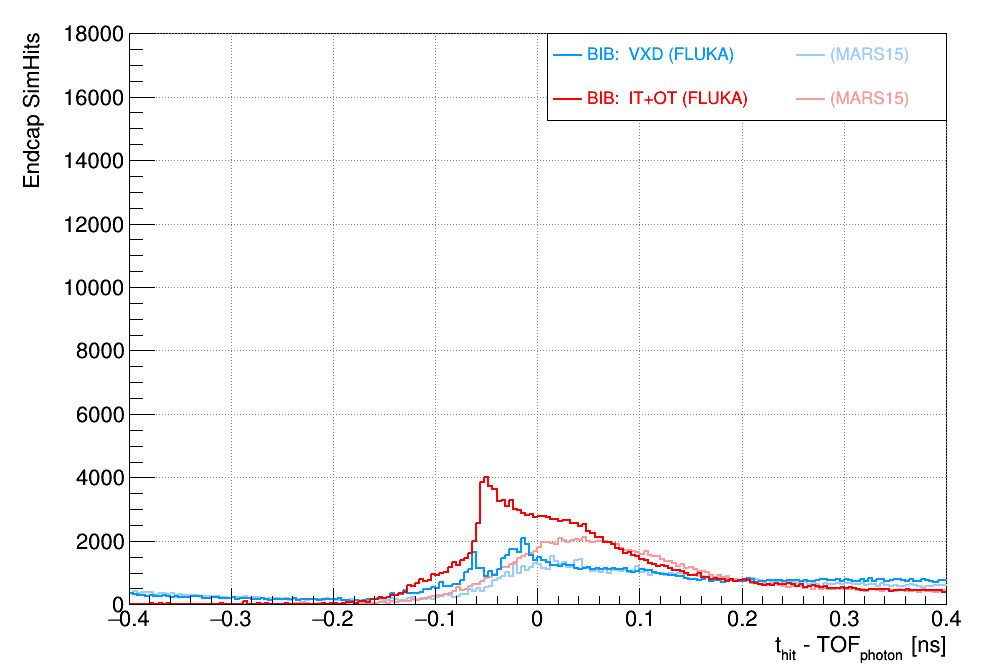

In [241]:
colors = [R.kAzure+7, R.kAzure-9,  2, R.kRed-9]
leg = R.TLegend(0.55,0.82, 0.95,0.95)
leg.SetNColumns(2)
leg.SetEntrySeparation(0.0)
leg.SetMargin(0.2)
leg.SetTextSize(0.027)
titles = ['BIB:  VXD (FLUKA)', '(MARS15)  ', 'BIB:  IT+OT (FLUKA)', '(MARS15)  ']
l1 = R.TLine(-0.09, 0, -0.09, 1.04)
l2 = R.TLine(0.09, 0, 0.09, 1.04)
for l in [l1, l2]:
    l.SetLineColor(colors[1])
    l.SetLineWidth(2)
    l.SetLineStyle(7)
h_drawn = []
for iH, histo in enumerate(histos):
    h = histo.Clone()
    R.SetOwnership(h, False)
#     if iH > 1:
    h.Rebin(4)
#     if iH > 1:
#         h.Scale(2.0)
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    if iH == 0:
        h.GetXaxis().SetTitleOffset(1.2)
#         h.SetAxisRange(-1, 8, 'X')
        h.SetAxisRange(0, 18e3, 'Y')
    if iH % 2 == 1:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    else:
        leg.AddEntry(h, titles[iH], 'L').SetTextColor(colors[iH])
    opt = '' if iH == 0 else 'same'
#     if iH%2 == 1:
#         h.SetFillColor(colors[iH])
    h.Draw('hist'+opt)
    h_drawn.append(h)
for iH in [0,2]:
    h_drawn[iH].Draw('hist same')
# leg.AddEntry(l1, '#pm3#sigma_{t} time window', 'L')
leg.Draw()
# l1.Draw()
# l2.Draw()
C.RedrawAxis()
C.Draw()
# C.SaveAs(os.path.join(DIR_IN, '../plots/digi/simhit_time_tof_trk_endcap_zoomin.pdf'))

In [76]:
R.TMath.RadToDeg() * R.TMath.ATan2(5, 100e3)

0.002864788973266792

In [75]:
0.001 * R.TMath.DegToRad()

1.7453292519943296e-05

In [198]:
dic = {5: 'five', 1: 'one', 10: 'ten', 0: 'zero'}

In [211]:
list(dic.values())[1:]

['one', 'ten', 'zero']